In [187]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [188]:
df_index = pd.read_csv("C:/Users/shrom/OneDrive/Documents/Multiple_Linear_Regression.csv")

In [189]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [190]:
# drop unnecessary column
df_index.drop(columns = ["Unnamed: 0", "year", "month"], axis = 1, inplace = True)

In [191]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [192]:
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

C:\Users\shrom\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


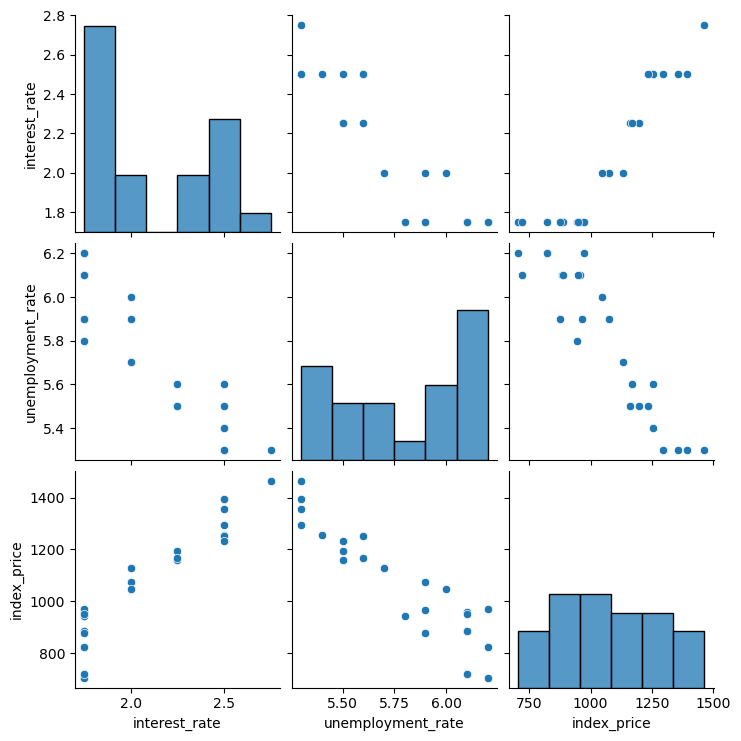

In [193]:
## Lets do some visualization
import seaborn as sns
sns.pairplot(df_index)

In [194]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935551
unemployment_rate,-0.925814,1.000000,-0.921791
index_price,0.935551,-0.921791,1.000000


Text(0, 0.5, 'Unemployment rate')

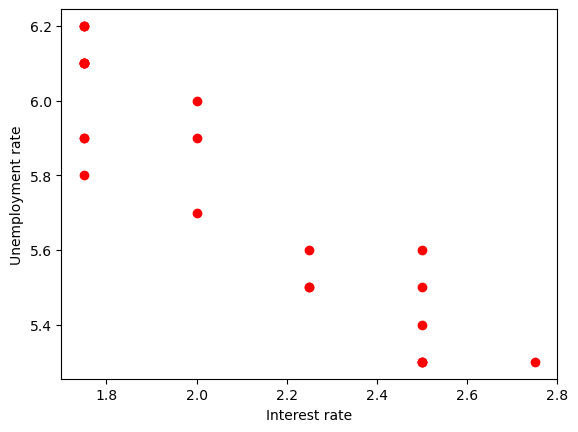

In [195]:
## Visualize the datapoints more closely
plt.scatter(df_index['interest_rate'], df_index['unemployment_rate'], color = 'r')
plt.xlabel("Interest rate")
plt.ylabel("Unemployment rate")

In [196]:
## independent and dependent feature
# X = df_index[['interest_rate', 'unemployment_rate']]
# y = df_index['index_price']
X = df_index.iloc[:,:-1]
y = df_index.iloc[:,-1]

In [197]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [198]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [200]:
y.shape

(24,)

In [201]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [204]:
y_test.shape

(6,)

In [142]:
import seaborn as sns

<Axes: xlabel='interest_rate', ylabel='index_price'>

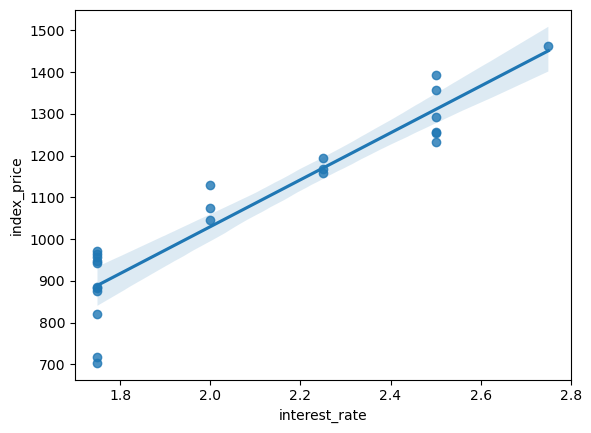

In [143]:
sns.regplot(x = df_index['interest_rate'], y = df_index['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

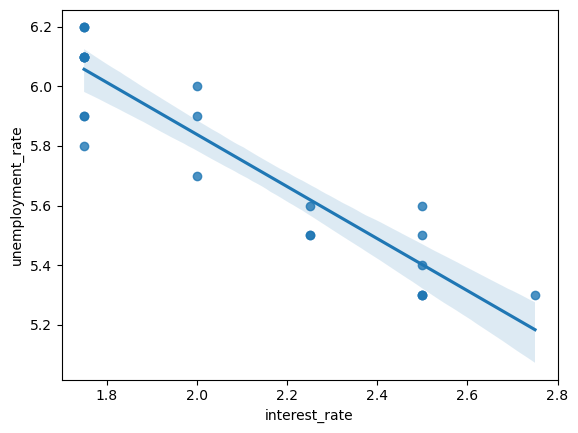

In [144]:
sns.regplot(x = df_index['interest_rate'], y = df_index['unemployment_rate'])

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

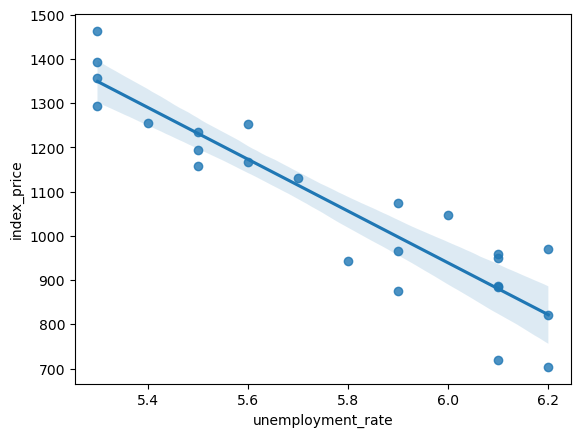

In [145]:
sns.regplot(x = df_index['unemployment_rate'], y = df_index['index_price'])

In [205]:
from sklearn.preprocessing import StandardScaler

In [206]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [208]:
X_train.shape, X_test.shape

((18, 2), (6, 2))

In [209]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [210]:
regression

LinearRegression()

In [219]:
regression.fit(X_train, y_train)

LinearRegression()

In [212]:
## cross validation
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 3)

In [213]:
validation_score

array([-4736.91640145, -7590.33370123, -5135.43725623])

In [214]:
np.mean(validation_score)

-5820.895786305121

In [220]:
y_pred = regression.predict(X_test)

In [221]:
y_pred

array([1204.36053131,  824.24567474, 1406.04754995,  859.93124233,
        996.46031923, 1168.67496372])

In [222]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [223]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

5617.24805073833
59.05845146407707
74.94830252072644


In [224]:
from sklearn.metrics import r2_score

In [225]:
score = r2_score(y_test, y_pred)
print(score)

0.8331411355900846


In [227]:
# display adjusted r- squared
adj_score = (1 - (1 - score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))
print(adj_score)

0.721901892650141


### Assumptions


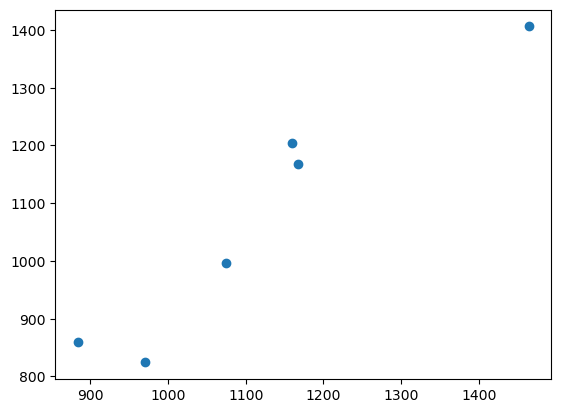

In [228]:
plt.scatter(y_test, y_pred)

In [230]:
residuals = y_test - y_pred
print(residuals)

8     -45.360531
16    146.754325
0      57.952450
18     24.068758
11     78.539681
9      -1.674964
Name: index_price, dtype: float64


C:\Users\shrom\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


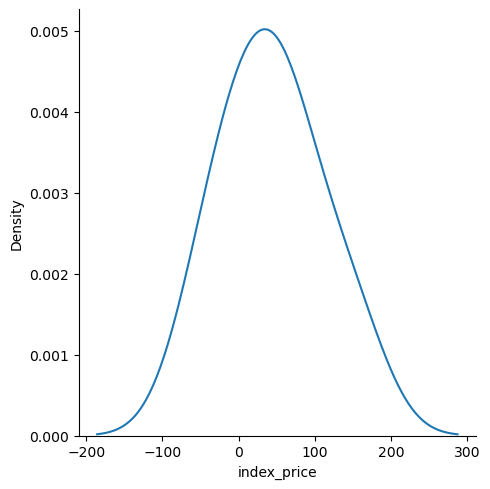

In [231]:
# Plot this residuals
sns.displot(residuals, kind = 'kde')

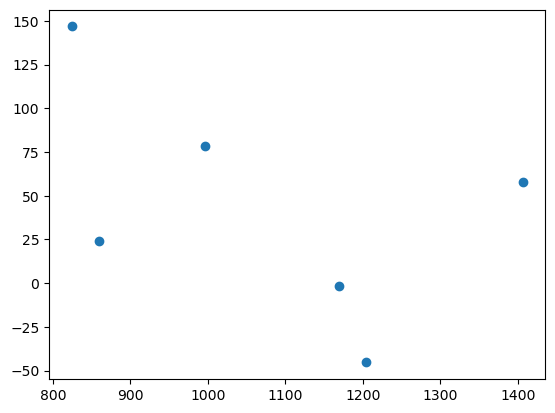

In [232]:
## scatter plot wrt prediction and residuals
plt.scatter(y_pred, residuals)

In [233]:
## OLS Linear Regression
import statsmodels.api as sm

In [234]:
model = sm.OLS(y_train, X_train).fit()

In [235]:
model.summary()

C:\Users\shrom\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.034
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2843
Date:                Fri, 12 Apr 2024   Prob (F-statistic):                       0.756
Time:                        01:57:51   Log-Likelihood:                         -150.87
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.3727    658.998      0.134      0.895   -1308.640    1485.386
x2          -115.0552    658.998     -0.175      0.864   -1512.068    1281.958
==============================================================================
Omnibus:                        0.861   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.650   Jarque-Bera (JB):                0.731
Skew:                          -0.436   Prob(JB):                        0.694
Kurtosis:                       2.537   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [237]:
print(regression.coef_)

[  88.37267107 -115.05517173]
